<a href="https://colab.research.google.com/github/harishankar1014/RLProject_Cancer/blob/main/Final_Code_Cancer_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
def initialize_cells():
  D = []
  s = 0
  lamb = 0.01
  num_nodes = 8
  x_nodes = np.linspace(0, 1, num_nodes)
  y_nodes = np.linspace(0, 1, num_nodes)
  z_nodes = np.linspace(0, 1, num_nodes)
  for x in x_nodes:
    for y in y_nodes:
      for z in z_nodes:
        D.append([x,y,z,s,[],lamb])
  return D

In [ ]:
test = np.array(initialize_cells())

<ipython-input-3-2610ec2e2639>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test = np.array(initialize_cells())


In [ ]:
h= 0.05
def calculate_distance(x1, y1, z1, x2, y2, z2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    return distance

In [ ]:
def nearest_neighbours_calc(test):
  for i in test:
    i[4] = []
    for j in test:
      distance = calculate_distance(i[0],i[1],i[2],j[0],j[1],j[2])
      if((distance!=0) and (distance <= h)):
        i[4].append(np.array(j[0:4]))

In [ ]:
def recalculate_neighbours(i):
  i[4] = []
  for j in test:
    distance = calculate_distance(i[0],i[1],i[2],j[0],j[1],j[2])
    if((distance!=0) and (distance <= h)):
      i[4].append(np.array(j[0:4]))

In [ ]:
def calculate_fraction(test,fraction):
  f = sum(test[:,3])/len(test[:,3])
  fraction.append(f)

In [ ]:
nearest_neighbours_calc(test)

In [ ]:
test_copy = test.copy()

In [ ]:
def simulate_cancer_model_new(test,tau):
    step = 0
    fraction = []

    # Calculate lambda for each node
    def calculate_lambda(i,lam):
        distances = []
        affected = []
        for e in i[4]:
          if e[3] == 1:
            affected.append(e)
        for node in affected:
          d = calculate_distance(i[0],i[1],i[2],node[0],node[1],node[2])
          s = node[3]
          distances.append((s/(d+1e-8)))
        if len(distances) == 0:
          return lam
        dist_sum = sum(distances)
        lambda_new = lam*dist_sum
        return lambda_new


    # Simulate until desired all nodes are in cancer state
    while sum(test[:,3])/len(test[:,3])!=1:
        for i in test:
            lam = calculate_lambda(i,i[5])
            i[5] = lam
            waiting_time = np.random.exponential(scale=1/lam)
            if waiting_time < tau:
              i[3] = 1  # Change node state to cancer
            recalculate_neighbours(i)
        step += 1
        calculate_fraction(test,fraction)
        print(fraction[-1])
    return step,fraction

In [ ]:
def simulate_cancer_model_fraction(test,tau,f_target):
    step = 0
    fraction = []

    # Calculate lambda for each node
    def calculate_lambda(i,lam):
        distances = []
        affected = []
        for e in i[4]:
          if e[3] == 1:
            affected.append(e)
        for node in affected:
          d = calculate_distance(i[0],i[1],i[2],node[0],node[1],node[2])
          s = node[3]
          distances.append((s/(d+1e-8)))
        if len(distances) == 0:
          return lam
        dist_sum = sum(distances)
        lambda_new = lam*dist_sum
        return lambda_new


    # Simulate until desired fraction of nodes are in cancer state
    while sum(test[:,3])/len(test[:,3]) <f_target:
        for i in test:
            lam = calculate_lambda(i,i[5])
            i[5] = lam
            waiting_time = np.random.exponential(scale=1/lam)
            if waiting_time < tau:
              i[3] = 1  # Change node state to cancer
            recalculate_neighbours(i)
        step += 1
        calculate_fraction(test,fraction)
    return step,fraction

In [ ]:
tau = 2
steps,fraction = simulate_cancer_model_new(test,tau)

0.009765625
0.041015625
0.052734375
0.083984375
0.111328125
0.123046875
0.134765625
0.146484375
0.1640625
0.18359375
0.197265625
0.22265625
0.2421875
0.26171875
0.2734375
0.28515625
0.298828125
0.318359375
0.333984375
0.35546875
0.376953125
0.38671875
0.404296875
0.412109375
0.42578125
0.435546875
0.44921875
0.458984375
0.474609375
0.474609375
0.484375
0.490234375
0.509765625
0.51171875
0.53125
0.53515625
0.54296875
0.546875
0.56640625
0.578125
0.5859375
0.58984375
0.59765625
0.607421875
0.61328125
0.6171875
0.625
0.626953125
0.62890625
0.63671875
0.646484375
0.65234375
0.66015625
0.66796875
0.677734375
0.6796875
0.685546875
0.69140625
0.703125
0.70703125
0.71484375
0.71484375
0.7265625
0.7265625
0.732421875
0.732421875
0.73828125
0.73828125
0.7421875
0.744140625
0.744140625
0.751953125
0.755859375
0.7578125
0.763671875
0.763671875
0.767578125
0.77734375
0.77734375
0.78125
0.783203125
0.78515625
0.79296875
0.794921875
0.798828125
0.80078125
0.802734375
0.8046875
0.8125
0.814453125
0.81

In [ ]:
time = []
for i in range(0,steps):
  time.append(i*tau)

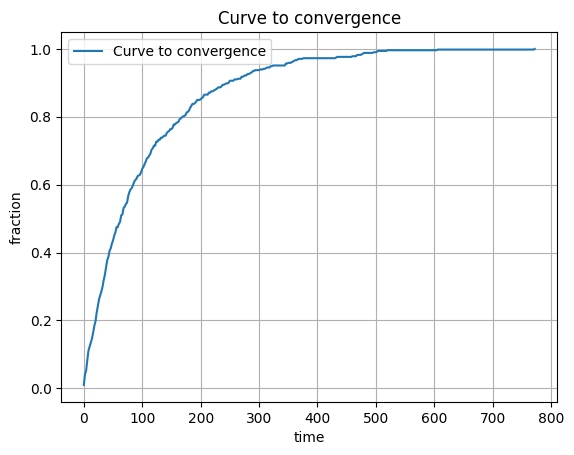

In [ ]:
# Plotting the curve
x_vals = time
y_vals = fraction
plt.plot(x_vals, y_vals, label='Curve to convergence')
plt.xlabel('time')
plt.ylabel('fraction')
plt.title('Curve to convergence')
plt.legend()
plt.grid(True)
plt.show()

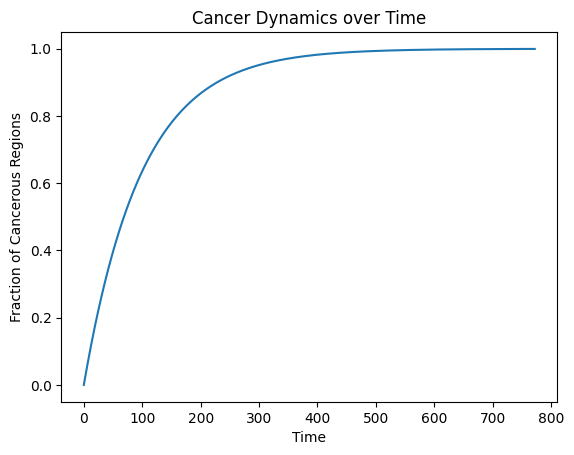

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_cancer_dynamics(tau, num_steps, convergence_threshold):
    time_points = np.arange(0, num_steps * tau, tau)
    fraction_cancer = np.zeros(num_steps)
    fraction_cancer[0] = 0

    for k in range(1, num_steps):
        p_prev = fraction_cancer[k - 1]
        lambda_val = 0.02
        p_k = (1 - p_prev) * lambda_val
        fraction_cancer[k] = p_prev + p_k

        if fraction_cancer[k] >= convergence_threshold:
            break

    return time_points[:k+1], fraction_cancer[:k+1]



# Simulation parameters
tau = 2
num_steps = steps
convergence_threshold = 1

# Simulate cancer dynamics using intergration
time_points, fraction_cancer = simulate_cancer_dynamics(tau, num_steps, convergence_threshold)

# Plot the results
plt.plot(time_points, fraction_cancer)
plt.xlabel('Time')
plt.ylabel('Fraction of Cancerous Regions')
plt.title('Cancer Dynamics over Time')
plt.show()

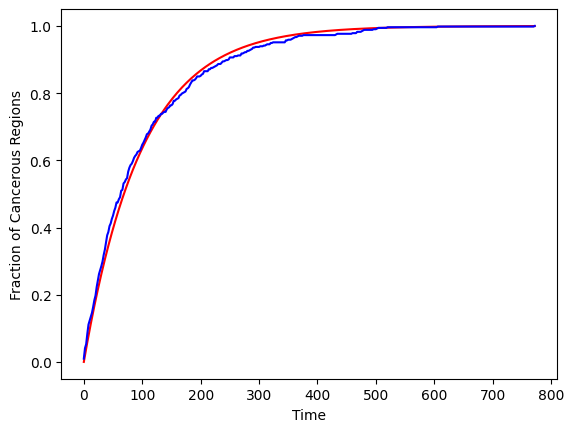

In [ ]:
#Ploting the stochastic and deteministic models
plt.plot(time_points, fraction_cancer,color='red')
plt.plot(time, fraction,color='blue')
plt.xlabel('Time')
plt.ylabel('Fraction of Cancerous Regions')
plt.show()

In [ ]:
diff = 0
for i in range(0,len(fraction)):
  diff = diff+(fraction[i]-fraction_cancer[i])*(fraction[i]-fraction_cancer[i])
mean = diff/len(fraction)
print("RMSE error: ",math.sqrt(mean))

RMSE error:  0.014001072513627732


In [ ]:
#Monte Carlo
# Parameters
tau = 2
f_target = 0.6

# Simulate the cancer model
step = []
for i in range(0,100):
  test = test_copy.copy()
  steps,fraction = simulate_cancer_model_fraction(test,tau,f_target)
  step.append(steps)
  # print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [1]:
#Simulation
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D array of shape (32, 32, 32) initialized with zeros
domain = []

# Generate x, y, and z values in the range [0, 1]
x_values = np.linspace(0, 1, 32)
y_values = np.linspace(0, 1, 32)
z_values = np.linspace(0, 1, 32)

# Iterate over each position in the 3D array and assign the corresponding x, y, and z values
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        for k, z in enumerate(z_values):
            # domain[i, j, k] = 0
            domain.append([x,y,z,0])

In [ ]:
domain = np.array(domain)

In [ ]:
#Selecting the middle cell
target = [0.51612903, 0.51612903, 0.51612903, 0.51612903]
distances = np.linalg.norm(domain - target, axis=1)
closest_index = np.argmin(distances)
print(closest_index)

16912


In [ ]:
def simulation(domain):
  domain[16912][3] = 1
  infected = [domain[16912]]
  infected_append = []
  step = 0


  while sum(domain[:,3])/len(domain[:,3]) != 1:
    for i in infected:
      step+=1
      for d in domain:
        print(infected)
        if(d[3]==0):
          distance = calculate_distance(i[0],i[1],i[2],d[0],d[1],d[2])
          if((distance!=0) and (distance <= 0.04)):
            d[3]=1
            infected.append(d)
        else:
          continue
      print(sum(domain[:,3])/len(domain[:,3]))



In [ ]:
# simulation(domain)

Streaming output truncated to the last 5000 lines.
[array([0.51612903, 0.51612903, 0.51612903, 1.        ]), array([0.48387097, 0.51612903, 0.51612903, 1.        ]), array([0.51612903, 0.48387097, 0.51612903, 1.        ]), array([0.51612903, 0.51612903, 0.48387097, 1.        ]), array([0.51612903, 0.51612903, 0.5483871 , 1.        ]), array([0.51612903, 0.5483871 , 0.51612903, 1.        ]), array([0.5483871 , 0.51612903, 0.51612903, 1.        ]), array([0.4516129 , 0.51612903, 0.51612903, 1.        ]), array([0.48387097, 0.48387097, 0.51612903, 1.        ]), array([0.48387097, 0.51612903, 0.48387097, 1.        ]), array([0.48387097, 0.51612903, 0.5483871 , 1.        ]), array([0.48387097, 0.5483871 , 0.51612903, 1.        ]), array([0.51612903, 0.4516129 , 0.51612903, 1.        ]), array([0.51612903, 0.48387097, 0.48387097, 1.        ]), array([0.51612903, 0.48387097, 0.5483871 , 1.        ]), array([0.5483871 , 0.48387097, 0.51612903, 1.        ]), array([0.51612903, 0.51612903, 0.451

KeyboardInterrupt: ignored

In [ ]:
print(sum(domain[:,3])/len(domain[:,3]))

In [ ]:
domain[16911]
distance = calculate_distance(domain[16912][0],domain[16912][1],domain[16912][2],domain[16913][0],domain[16913][1],domain[16913][2])
print(distance)

In [ ]:
import numpy as np

def create_domain(h,lam):
  domain = []
  x_values = np.linspace(0, 1, h)
  y_values = np.linspace(0, 1, h)
  z_values = np.linspace(0, 1, h)

  for x in x_values:
    for y in y_values:
        for z in z_values:
            # domain[i, j, k] = 0
            domain.append([x,y,z,0,[],lam])
  domain = np.array(domain)
  return domain

In [ ]:
# domain = create_domain(8,lam)
# domain

<ipython-input-109-2365053e96fa>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  domain = np.array(domain)


array([[0.0, 0.0, 0.0, 0, list([])],
       [0.0, 0.0, 0.14285714285714285, 0, list([])],
       [0.0, 0.0, 0.2857142857142857, 0, list([])],
       ...,
       [1.0, 1.0, 0.7142857142857142, 0, list([])],
       [1.0, 1.0, 0.8571428571428571, 0, list([])],
       [1.0, 1.0, 1.0, 0, list([])]], dtype=object)

In [ ]:
# Parameters
N = 5 # Total number of nodes
lambda_val = 0.01  # Transition probability rate lambda
alpha = 0.05  # Sensitivity to UV radiation
tau = 2.5 # Time interval
f_target = 0.5  # Target fraction of nodes in cancer state
domain = create_domain(32,lambda_val)


# Simulate the cancer model
steps,fraction = simulate_cancer_model_new(domain, lambda_val, alpha, tau, f_target)

<ipython-input-112-0f31eae64830>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  domain = np.array(domain)


0.025299072265625
0.39410400390625
0.999481201171875
1.0


In [4]:
#Single direction
import math
import numpy as np
h = 0.3
def one_d_domain(n):
  domain = []
  num_nodes = n
  x_start = 0.0
  x_end = 1.0
  x_nodes = np.linspace(x_start, x_end, num_nodes)
  for x in x_nodes:
    domain.append([x,0,[],0.01])
  return domain
one_domain = np.array(one_d_domain(600))

<ipython-input-4-c0de1ee55247>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  one_domain = np.array(one_d_domain(600))


In [5]:
def nearest_neighbours_calc_one(test):
  for i in test:
    i[2] = []
    for j in test:
      distance = calculate_distance_one(i[0],j[0])
      if((distance!=0) and (distance <= h)):
        i[2].append(np.array(j[0:2]))

In [6]:
def calculate_distance_one(x1, x2):
    distance = math.sqrt((x2 - x1)**2)
    return distance

In [8]:
def recalculate_neighbours_one(i,h):
  i[2] = []
  for j in one_domain:
    distance = calculate_distance_one(i[0],j[0])
    if((distance!=0) and (distance <= h)):
      i[2].append(np.array(j[0:2]))

In [9]:
def calculate_fraction_one(test,fraction):
  f = sum(test[:,1])/len(test[:,1])
  fraction.append(f)

In [10]:
def simulate_cancer_model_one(test, tau):
    step = 0
    fraction = [0]

    def calculate_lambda(i,lam):
        distances = []
        affected = []
        for e in i[2]:
          if e[1] == 1:
            affected.append(e)
        for node in affected:
          d = calculate_distance_one(i[0],node[0])
          s = node[1]
          distances.append((s/(d+1e-8)))
        if len(distances) == 0:
          return lam

        dist_sum = sum(distances)
        lambda_new = lam*dist_sum
        return lambda_new


    while sum(test[:,1])/len(test[:,1])!=1:
        for i in test:
            lam = calculate_lambda(i,i[3])
            i[3] = lam
            # print("lambda "+str(lam))
            waiting_time = np.random.exponential(scale=1/lam)
            if waiting_time < tau:
              i[1] = 1  # Change node state to cancer
            recalculate_neighbours_one(i,0.3)
        step += 1
        calculate_fraction_one(test,fraction)
        # print(fraction[-1])
    return step,fraction

In [11]:
nearest_neighbours_calc_one(one_domain)
one_domain_copy = one_domain.copy()

In [12]:
# Parameters
tau = 2.5 # Time interval
f_target = 0.5  # Target fraction of nodes in cancer state
one_domain_copy = one_domain.copy()

# Simulate the cancer model
steps_one,fraction_one = simulate_cancer_model_one(one_domain,tau)

lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lamb

In [13]:
#Monte Carlo 1D
steps_array_one = []
print("Monte carlo 1D 600")
for _ in range(0,1000):
  one_domain = one_domain_copy.copy()
  steps_one,fraction_one = simulate_cancer_model_one(one_domain,tau)
  steps_array_one.append(steps_one)
print(sum(steps_array_one)/len(steps_array_one))

Streaming output truncated to the last 5000 lines.
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
lambda 0.01
l

KeyboardInterrupt: ignored

In [14]:
# steps_array_one
avg_steps = []
index = 1
while 10*index <= (len(steps_array_one)):
  avg_steps.append(sum(steps_array_one[:10*index])/len(steps_array_one[:10*index]))
  index +=1

In [16]:
y_axis =  list(range(0, 870, 10))

In [15]:
len(avg_steps)

87

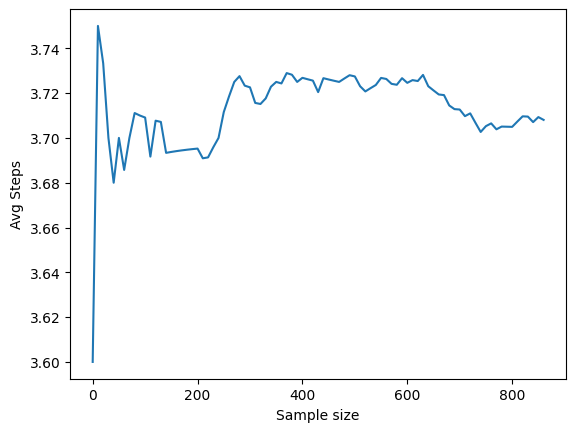

In [17]:
import matplotlib.pyplot as plt
plt.plot(y_axis,avg_steps)
plt.xlabel('Sample size')
plt.ylabel('Avg Steps')
plt.show()